In [25]:
import os
import glob
from functools import reduce

In [26]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [38]:
results_dir = "../../results/"
base_dir = "timeseries/time-varying/"
arrival_rates = ["1_X_max",
                 "2_X_max",
                 "3_X_max"]
run_types = ["single-backend",
             "two-backends",
             "three-backends",
             "all-backends"]
fluctuation_timeperiod = "500ms-fluctuation"
# run_time = "5mins-run"
algos = ["wlc", 
         "feedback-wlc"]
runs = ["1st-seed-run",
        "2nd-seed-run"]

## Response rate

In [39]:
rr_percentiles = ['Request rate', 'Response rate 50%', 'Response rate 66%', 'Response rate 75%',
                  'Response rate 80%', 'Response rate 90%', 'Response rate 95%', 'Response rate 98%',
                  'Response rate 99%', 'Response rate 100%'] 

In [40]:
rr_plot_data_dict = {}

for i in glob.glob(results_dir + base_dir + "*/*/" + fluctuation_timeperiod + "/*/*/*/" +
                   "response_rate.csv"):
    is_match = False
    for arrival_rate in arrival_rates:
        for run_type in run_types:
            for algo in algos:
                for run in runs:
                    if arrival_rate in i and run_type in i and ("/"+algo+"/") in i and run in i:
                        rr_plot_data_dict[arrival_rate+":"+run_type+":"+algo+":"+run] = pd.read_csv(i, header=0, na_filter=False)

In [41]:
rr_plot_data = pd.DataFrame()
rr_plot_data['percentiles'] = rr_percentiles

rr_plot_percentile_dict = {}
for i in rr_percentiles:
    for k in rr_plot_data_dict:
        if k in rr_plot_percentile_dict:
            rr_plot_percentile_dict[k].append(rr_plot_data_dict[k][i][0])
        else:
            rr_plot_percentile_dict[k] = []
            rr_plot_percentile_dict[k].append(rr_plot_data_dict[k][i][0])
            
for k in rr_plot_data_dict:
    rr_plot_data[k] = rr_plot_percentile_dict[k]

In [42]:
# rr_plot_data.plot('percentiles', kind='bar')

## Response time

In [43]:
rt_percentiles = ['Response time', 'Response time 50%', 'Response time 66%', 'Response time 75%',
                  'Response time 80%', 'Response time 90%', 'Response time 95%', 'Response time 98%',
                  'Response time 99%', 'Response time 100%']

In [44]:
rt_plot_data_dict = {}

for i in glob.glob(results_dir + base_dir + "*/*/" + fluctuation_timeperiod + "/*/*/*/" +
                   "response_time.csv"):
    is_match = False
    for arrival_rate in arrival_rates:
        for run_type in run_types:
            for algo in algos:
                for run in runs:
                    if arrival_rate in i and run_type in i and ("/"+algo+"/") in i and run in i:
                        rt_plot_data_dict[arrival_rate+":"+run_type+":"+algo+":"+run] = pd.read_csv(i, header=0, na_filter=False)

In [45]:
rt_plot_data = pd.DataFrame()
rt_plot_data['percentiles'] = rt_percentiles

rt_plot_percentile_dict = {}
for i in rt_percentiles:
    for k in rt_plot_data_dict:
        if k in rt_plot_percentile_dict:
            rt_plot_percentile_dict[k].append(rt_plot_data_dict[k][i][0])
        else:
            rt_plot_percentile_dict[k] = []
            rt_plot_percentile_dict[k].append(rt_plot_data_dict[k][i][0])
            
for k in rt_plot_data_dict:
    rt_plot_data[k] = rt_plot_percentile_dict[k]
    
rt_plot_data.columns.values

array(['percentiles', '1_X_max:all-backends:wlc:2nd-seed-run',
       '2_X_max:single-backend:wlc:2nd-seed-run',
       '1_X_max:single-backend:wlc:2nd-seed-run',
       '1_X_max:two-backends:feedback-wlc:1st-seed-run',
       '2_X_max:all-backends:wlc:1st-seed-run',
       '3_X_max:single-backend:feedback-wlc:2nd-seed-run',
       '2_X_max:two-backends:wlc:1st-seed-run',
       '1_X_max:all-backends:feedback-wlc:2nd-seed-run',
       '2_X_max:three-backends:wlc:1st-seed-run',
       '1_X_max:three-backends:wlc:1st-seed-run',
       '1_X_max:single-backend:feedback-wlc:2nd-seed-run',
       '2_X_max:three-backends:wlc:2nd-seed-run',
       '2_X_max:single-backend:wlc:1st-seed-run',
       '3_X_max:two-backends:feedback-wlc:1st-seed-run',
       '2_X_max:single-backend:feedback-wlc:2nd-seed-run',
       '3_X_max:three-backends:wlc:1st-seed-run',
       '1_X_max:single-backend:feedback-wlc:1st-seed-run',
       '2_X_max:three-backends:feedback-wlc:2nd-seed-run',
       '2_X_max:all-backe

### Percentiles ...

500ms fluctuation, 0.5 alpha, 0.001 state feedback, 0.001 stat collection.

In [46]:
err_dict = {}
for arrival_rate in arrival_rates:
    for run_type in run_types:
        for algo in algos:
            err_dict[arrival_rate+":"+run_type+":"+algo] = pd.DataFrame()
            
index = ['Avg.', '50%', '66%', '75%', '80%', '90%', '95%', '98%', '99%', '100%']
means = pd.DataFrame()
means['percentiles'] = index
errs = pd.DataFrame()
errs['percentiles'] = index

means = means.set_index('percentiles')
errs = errs.set_index('percentiles')

for i in range(len(rt_percentiles)):
    for arrival_rate in arrival_rates:
        for run_type in run_types:
            for algo in algos:
                err_list = []
                for run in runs:
                    err_list.append(rt_plot_data[arrival_rate+":"+run_type+":"+algo+":"+run][i])
                err_dict[arrival_rate+":"+run_type+":"+algo][rt_percentiles[i]] = err_list

for arrival_rate in arrival_rates:
    for run_type in run_types:
        for algo in algos:
            means[arrival_rate+":"+run_type+":"+algo] = list(err_dict[arrival_rate+":"+run_type+":"+algo].mean())    
            errs[arrival_rate+":"+run_type+":"+algo] = list(err_dict[arrival_rate+":"+run_type+":"+algo].std())

# means.plot(kind='bar', yerr=errs)

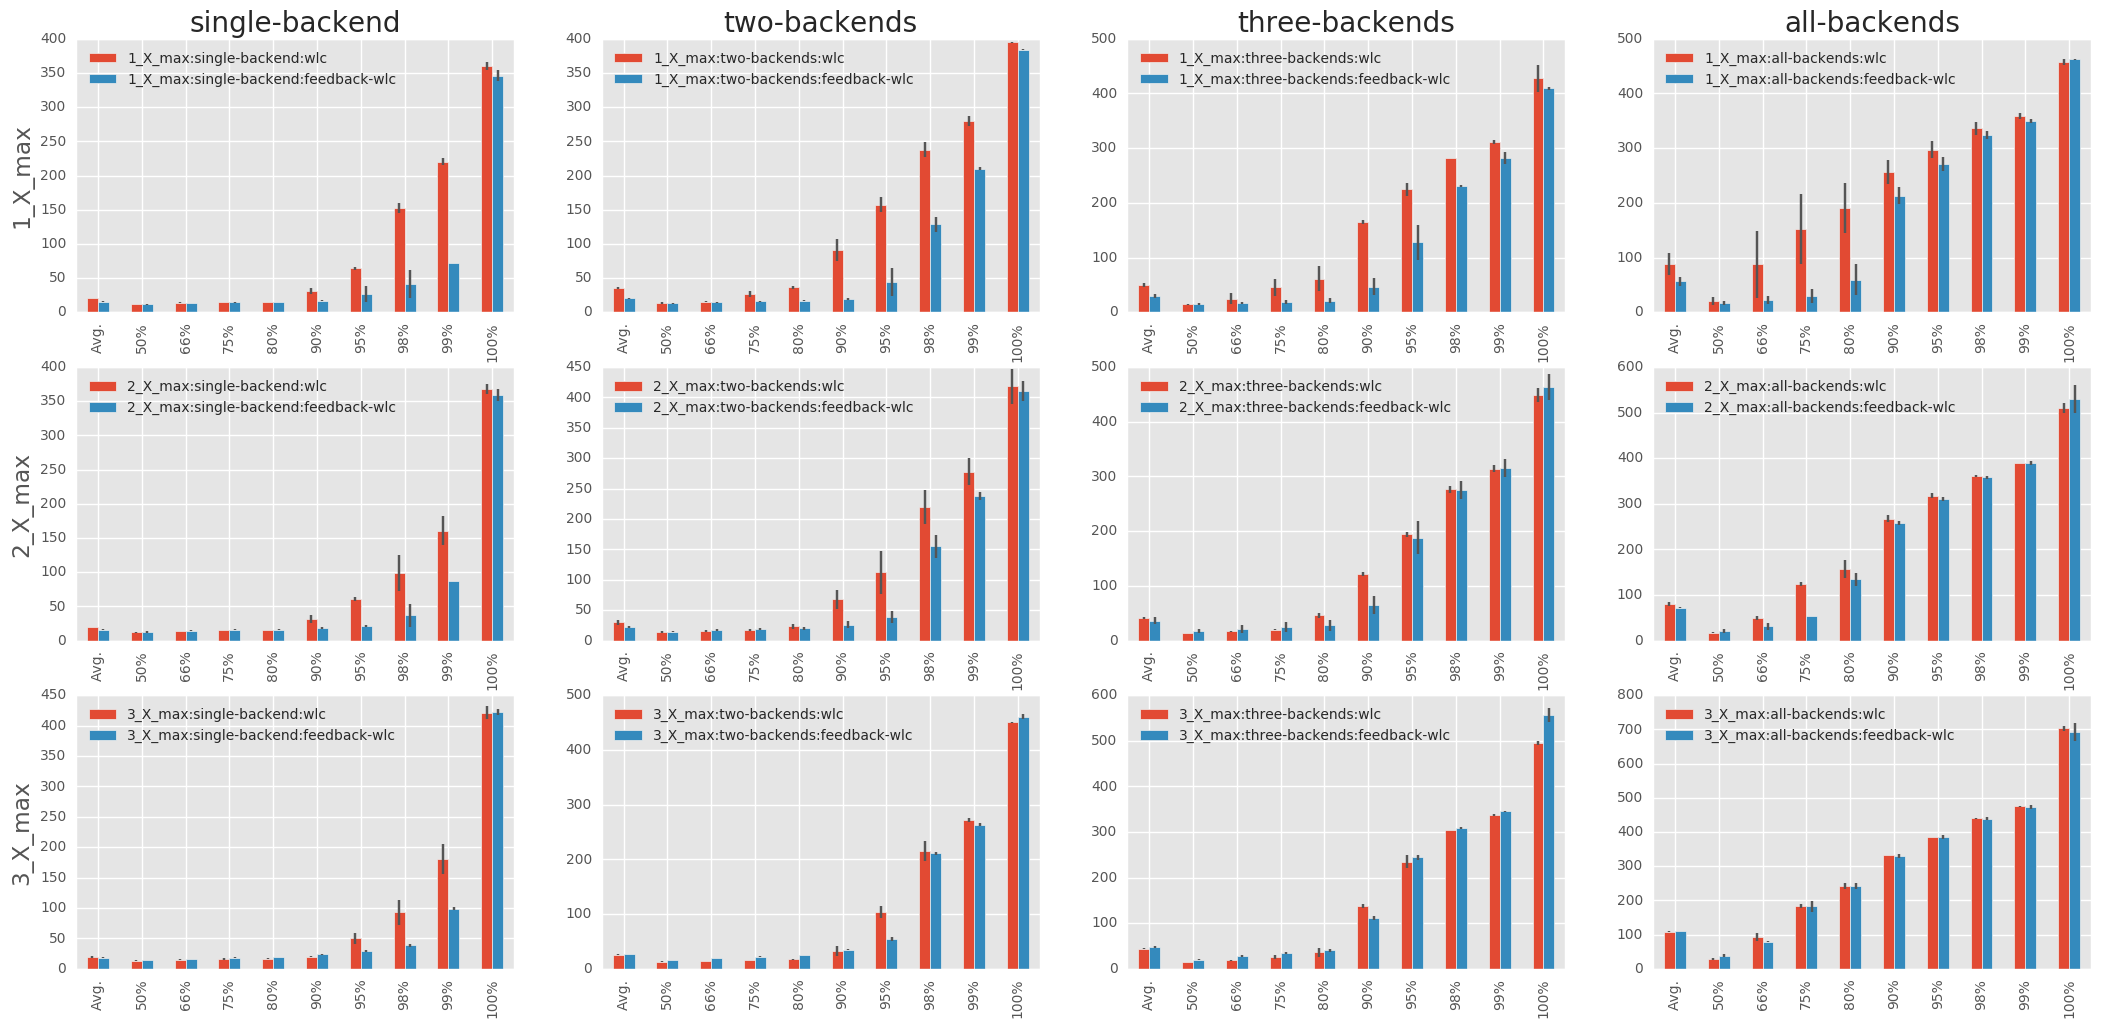

In [47]:
fig, ax = plt.subplots(nrows=3, ncols=4)

for i in range(len(arrival_rates)):
    for j in range(len(run_types)):
        param_list = []
        for algo in algos:
            param_list.append(arrival_rates[i]+":"+run_types[j]+":"+algo)
        title = ''
        if i == 0:
            title = run_types[j]
        means[param_list].plot(kind='bar', yerr=errs, legend=True, figsize=(26,12), ax=ax[i,j], title=title)
        ylabel = ''
        if j == 0:
            ylabel = arrival_rates[i]
        ax[i,j].set_ylabel(ylabel)
        ax[i,j].set_xlabel('')     
    
fig.savefig('time-varying-plots.pdf')

## With Oracle Trendline

In [48]:
or_run_types = ["oracle-three-backends"]
or_run = "run"

In [49]:
or_rt_plot_data_dict = {}

for i in glob.glob(results_dir + base_dir + "*/*/" + fluctuation_timeperiod + "/*/*/*/" +
                   "response_time.csv"):
    is_match = False
    for arrival_rate in arrival_rates:
        for or_run_type in or_run_types:
            for algo in algos:
                if arrival_rate in i and or_run_type in i and ("/"+algo+"/") in i and or_run in i:
                    or_rt_plot_data_dict[arrival_rate+":"+or_run_type+":"+algo] = pd.read_csv(i, header=0, na_filter=False)

In [50]:
or_rt_plot_data = pd.DataFrame()
or_rt_plot_data['percentiles'] = rt_percentiles

or_rt_plot_percentile_dict = {}
for i in rt_percentiles:
    for k in or_rt_plot_data_dict:
        if k in or_rt_plot_percentile_dict:
            or_rt_plot_percentile_dict[k].append(or_rt_plot_data_dict[k][i][0])
        else:
            or_rt_plot_percentile_dict[k] = []
            or_rt_plot_percentile_dict[k].append(or_rt_plot_data_dict[k][i][0])
            
for k in or_rt_plot_data_dict:
    or_rt_plot_data[k] = or_rt_plot_percentile_dict[k]
    
or_rt_plot_data.columns.values

array(['percentiles', '3_X_max:oracle-three-backends:wlc',
       '2_X_max:oracle-three-backends:wlc',
       '2_X_max:oracle-three-backends:feedback-wlc',
       '3_X_max:oracle-three-backends:feedback-wlc',
       '1_X_max:oracle-three-backends:wlc',
       '1_X_max:oracle-three-backends:feedback-wlc'], dtype=object)

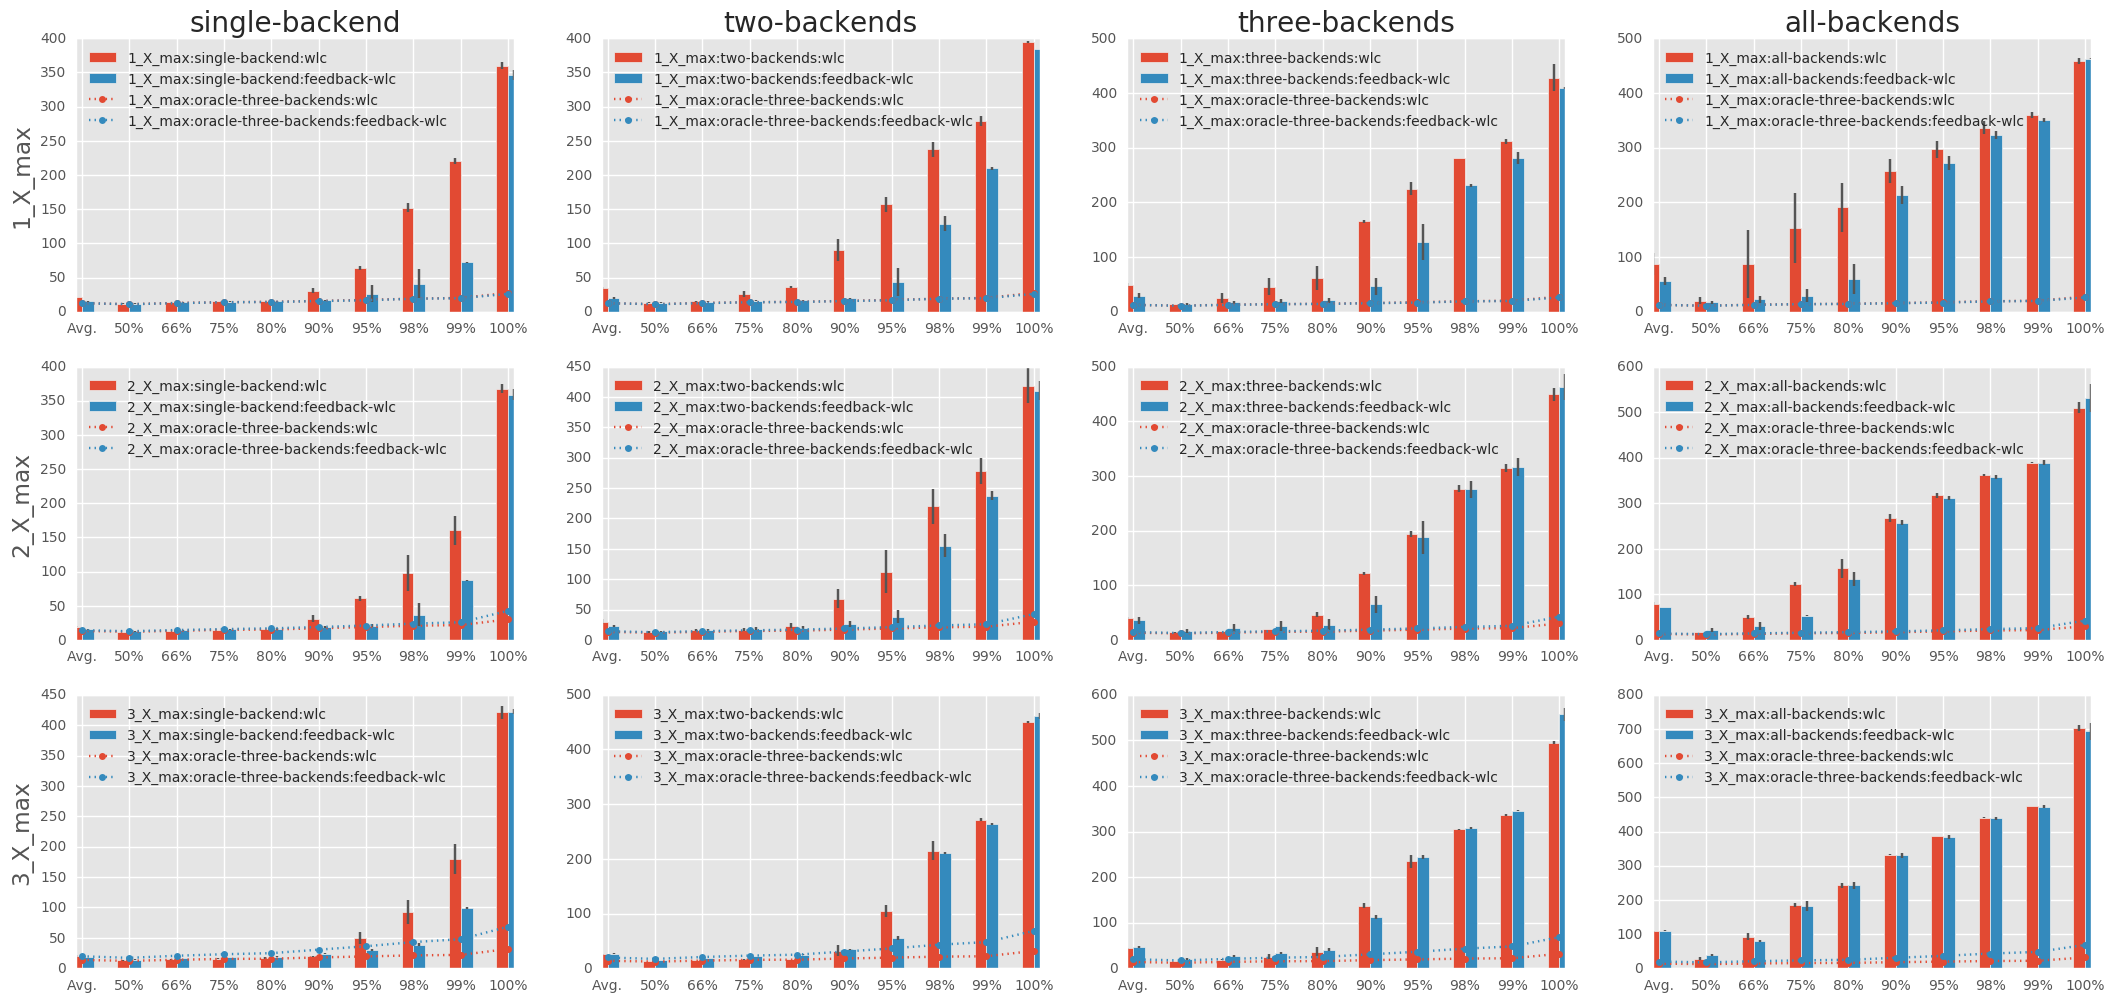

In [51]:
fig, ax = plt.subplots(nrows=3, ncols=4)

for i in range(len(arrival_rates)):
    for j in range(len(run_types)):
        param_list = []
        or_param_list = []
        for algo in algos:
            param_list.append(arrival_rates[i]+":"+run_types[j]+":"+algo)
            or_param_list.append(arrival_rates[i]+":"+or_run_types[0]+":"+algo)
        title = ''
        if i == 0:
            title = run_types[j]
        means[param_list].plot(kind='bar', yerr=errs, legend=True, figsize=(26,12), ax=ax[i,j], title=title)
        or_rt_plot_data[or_param_list].plot(legend=True, figsize=(26,12), ax=ax[i,j], linestyle=':', marker='o', markersize=5)
        ylabel = ''
        if j == 0:
            ylabel = arrival_rates[i]
        ax[i,j].set_ylabel(ylabel)
        ax[i,j].set_xlabel('')     
    
fig.savefig('time-varying-plots-with-ideal-trendline.pdf')

## With Saturated Trendline

In [52]:
sa_run_types = ["saturated-all-backends"]
sa_run = "run"

In [53]:
sa_rt_plot_data_dict = {}

for i in glob.glob(results_dir + base_dir + "*/*/" + fluctuation_timeperiod + "/*/*/*/" +
                   "response_time.csv"):
    is_match = False
    for arrival_rate in arrival_rates:
        for sa_run_type in sa_run_types:
            for algo in algos:
                if arrival_rate in i and sa_run_type in i and ("/"+algo+"/") in i and sa_run in i:
                    sa_rt_plot_data_dict[arrival_rate+":"+sa_run_type+":"+algo] = pd.read_csv(i, header=0, na_filter=False)

In [54]:
sa_rt_plot_data = pd.DataFrame()
sa_rt_plot_data['percentiles'] = rt_percentiles

sa_rt_plot_percentile_dict = {}
for i in rt_percentiles:
    for k in sa_rt_plot_data_dict:
        if k in sa_rt_plot_percentile_dict:
            sa_rt_plot_percentile_dict[k].append(sa_rt_plot_data_dict[k][i][0])
        else:
            sa_rt_plot_percentile_dict[k] = []
            sa_rt_plot_percentile_dict[k].append(sa_rt_plot_data_dict[k][i][0])
            
for k in sa_rt_plot_data_dict:
    sa_rt_plot_data[k] = sa_rt_plot_percentile_dict[k]
    
sa_rt_plot_data.columns.values

array(['percentiles', '1_X_max:saturated-all-backends:feedback-wlc',
       '3_X_max:saturated-all-backends:wlc',
       '2_X_max:saturated-all-backends:wlc',
       '1_X_max:saturated-all-backends:wlc',
       '2_X_max:saturated-all-backends:feedback-wlc',
       '3_X_max:saturated-all-backends:feedback-wlc'], dtype=object)

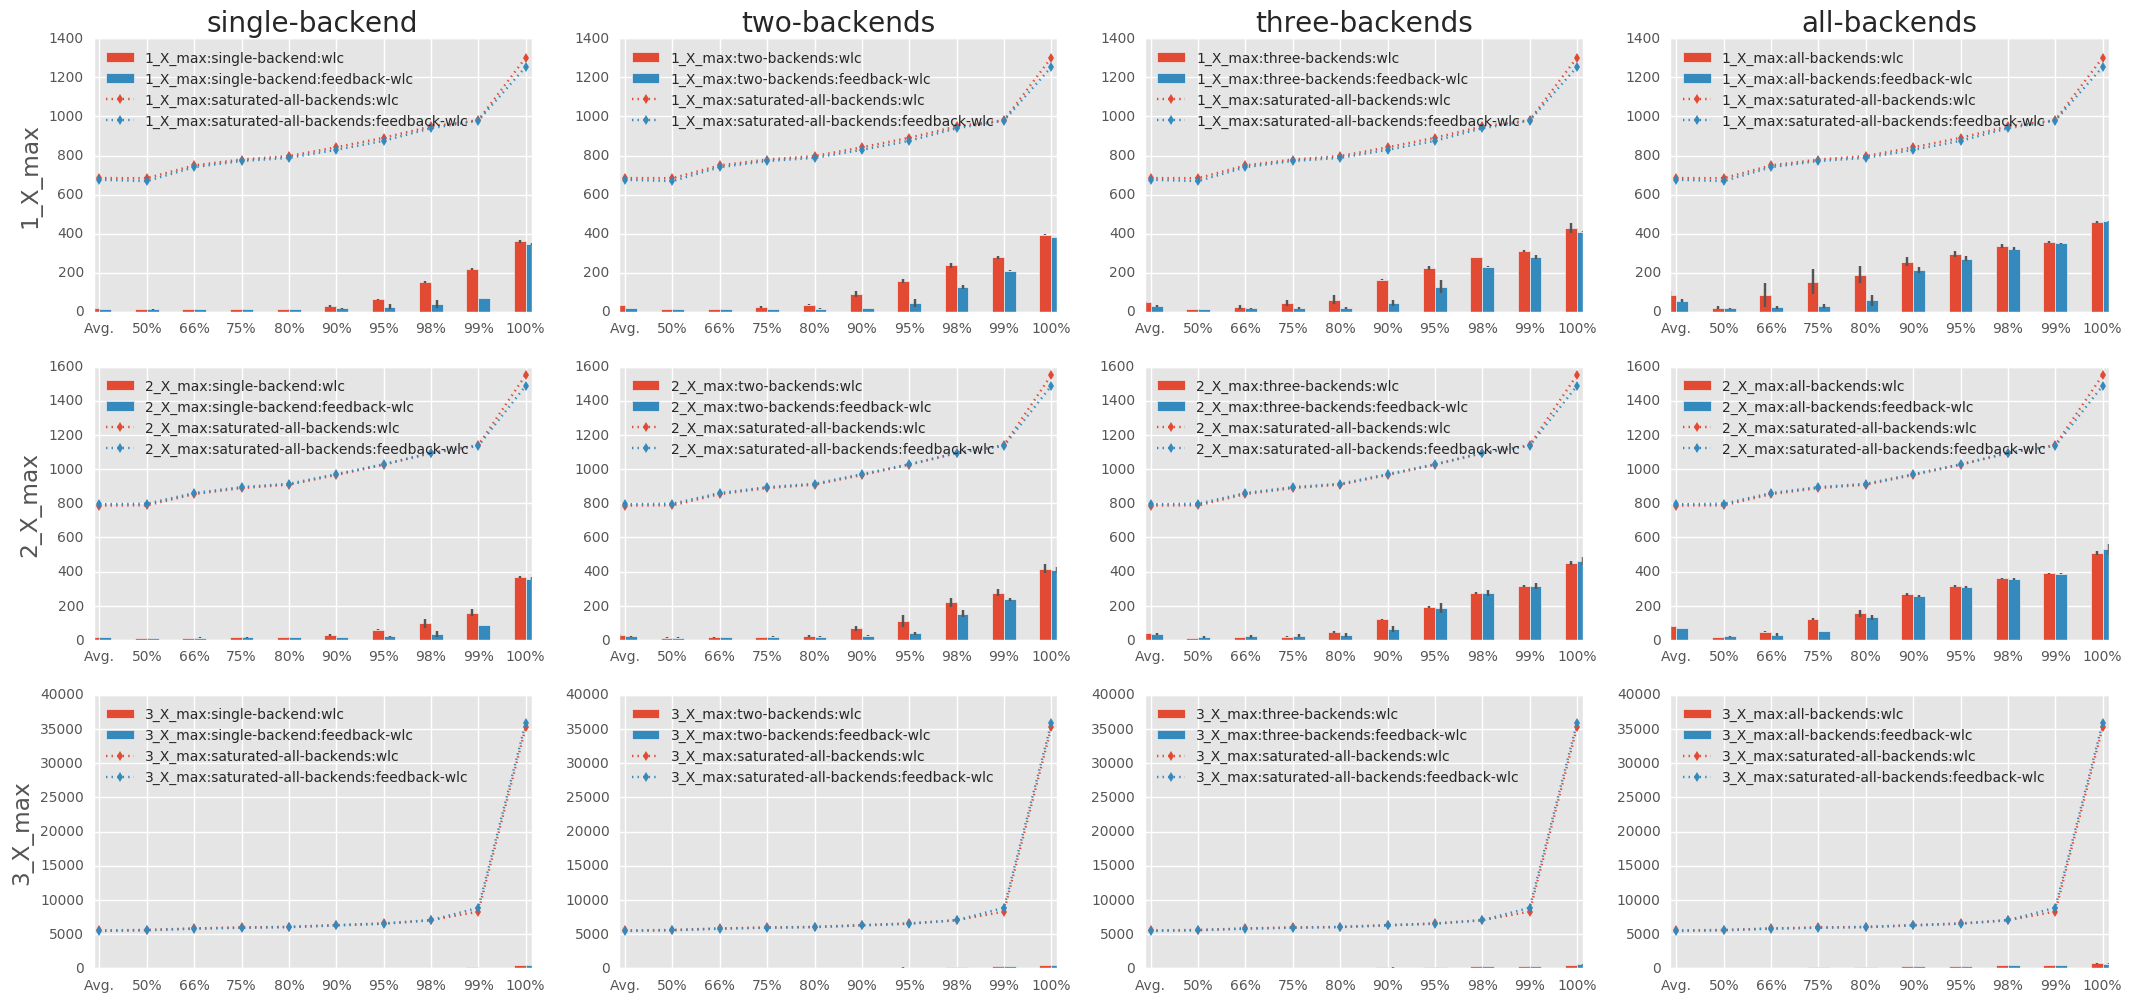

In [55]:
fig, ax = plt.subplots(nrows=3, ncols=4)

for i in range(len(arrival_rates)):
    for j in range(len(run_types)):
        param_list = []
        or_param_list = []
        sa_param_list = []
        for algo in algos:
            param_list.append(arrival_rates[i]+":"+run_types[j]+":"+algo)
            or_param_list.append(arrival_rates[i]+":"+or_run_types[0]+":"+algo)
            sa_param_list.append(arrival_rates[i]+":"+sa_run_types[0]+":"+algo)
        title = ''
        if i == 0:
            title = run_types[j]
        means[param_list].plot(kind='bar', yerr=errs, legend=True, figsize=(26,12), ax=ax[i,j], title=title)
#         or_rt_plot_data[or_param_list].plot(legend=True, figsize=(26,12), ax=ax[i,j], linestyle=':', marker='o', markersize=5)
        sa_rt_plot_data[sa_param_list].plot(legend=True, figsize=(26,12), ax=ax[i,j], linestyle=':', marker='d', markersize=5)
        ylabel = ''
        if j == 0:
            ylabel = arrival_rates[i]
        ax[i,j].set_ylabel(ylabel)
        ax[i,j].set_xlabel('')     
    
fig.savefig('time-varying-plots-with-saturated-trendline.pdf')

## With Loaded Trendline

In [56]:
lo_run_types = ["loaded-all-backends"]
lo_run = "run"

In [57]:
lo_rt_plot_data_dict = {}

for i in glob.glob(results_dir + base_dir + "*/*/" + fluctuation_timeperiod + "/*/*/*/" +
                   "response_time.csv"):
    is_match = False
    for arrival_rate in arrival_rates:
        for lo_run_type in lo_run_types:
            for algo in algos:
                if arrival_rate in i and lo_run_type in i and ("/"+algo+"/") in i and lo_run in i:
                    lo_rt_plot_data_dict[arrival_rate+":"+lo_run_type+":"+algo] = pd.read_csv(i, header=0, na_filter=False)

In [58]:
lo_rt_plot_data = pd.DataFrame()
lo_rt_plot_data['percentiles'] = rt_percentiles

lo_rt_plot_percentile_dict = {}
for i in rt_percentiles:
    for k in lo_rt_plot_data_dict:
        if k in lo_rt_plot_percentile_dict:
            lo_rt_plot_percentile_dict[k].append(lo_rt_plot_data_dict[k][i][0])
        else:
            lo_rt_plot_percentile_dict[k] = []
            lo_rt_plot_percentile_dict[k].append(lo_rt_plot_data_dict[k][i][0])
            
for k in lo_rt_plot_data_dict:
    lo_rt_plot_data[k] = lo_rt_plot_percentile_dict[k]
    
lo_rt_plot_data.columns.values

array(['percentiles', '3_X_max:loaded-all-backends:feedback-wlc',
       '3_X_max:loaded-all-backends:wlc',
       '1_X_max:loaded-all-backends:wlc',
       '2_X_max:loaded-all-backends:feedback-wlc',
       '1_X_max:loaded-all-backends:feedback-wlc',
       '2_X_max:loaded-all-backends:wlc'], dtype=object)

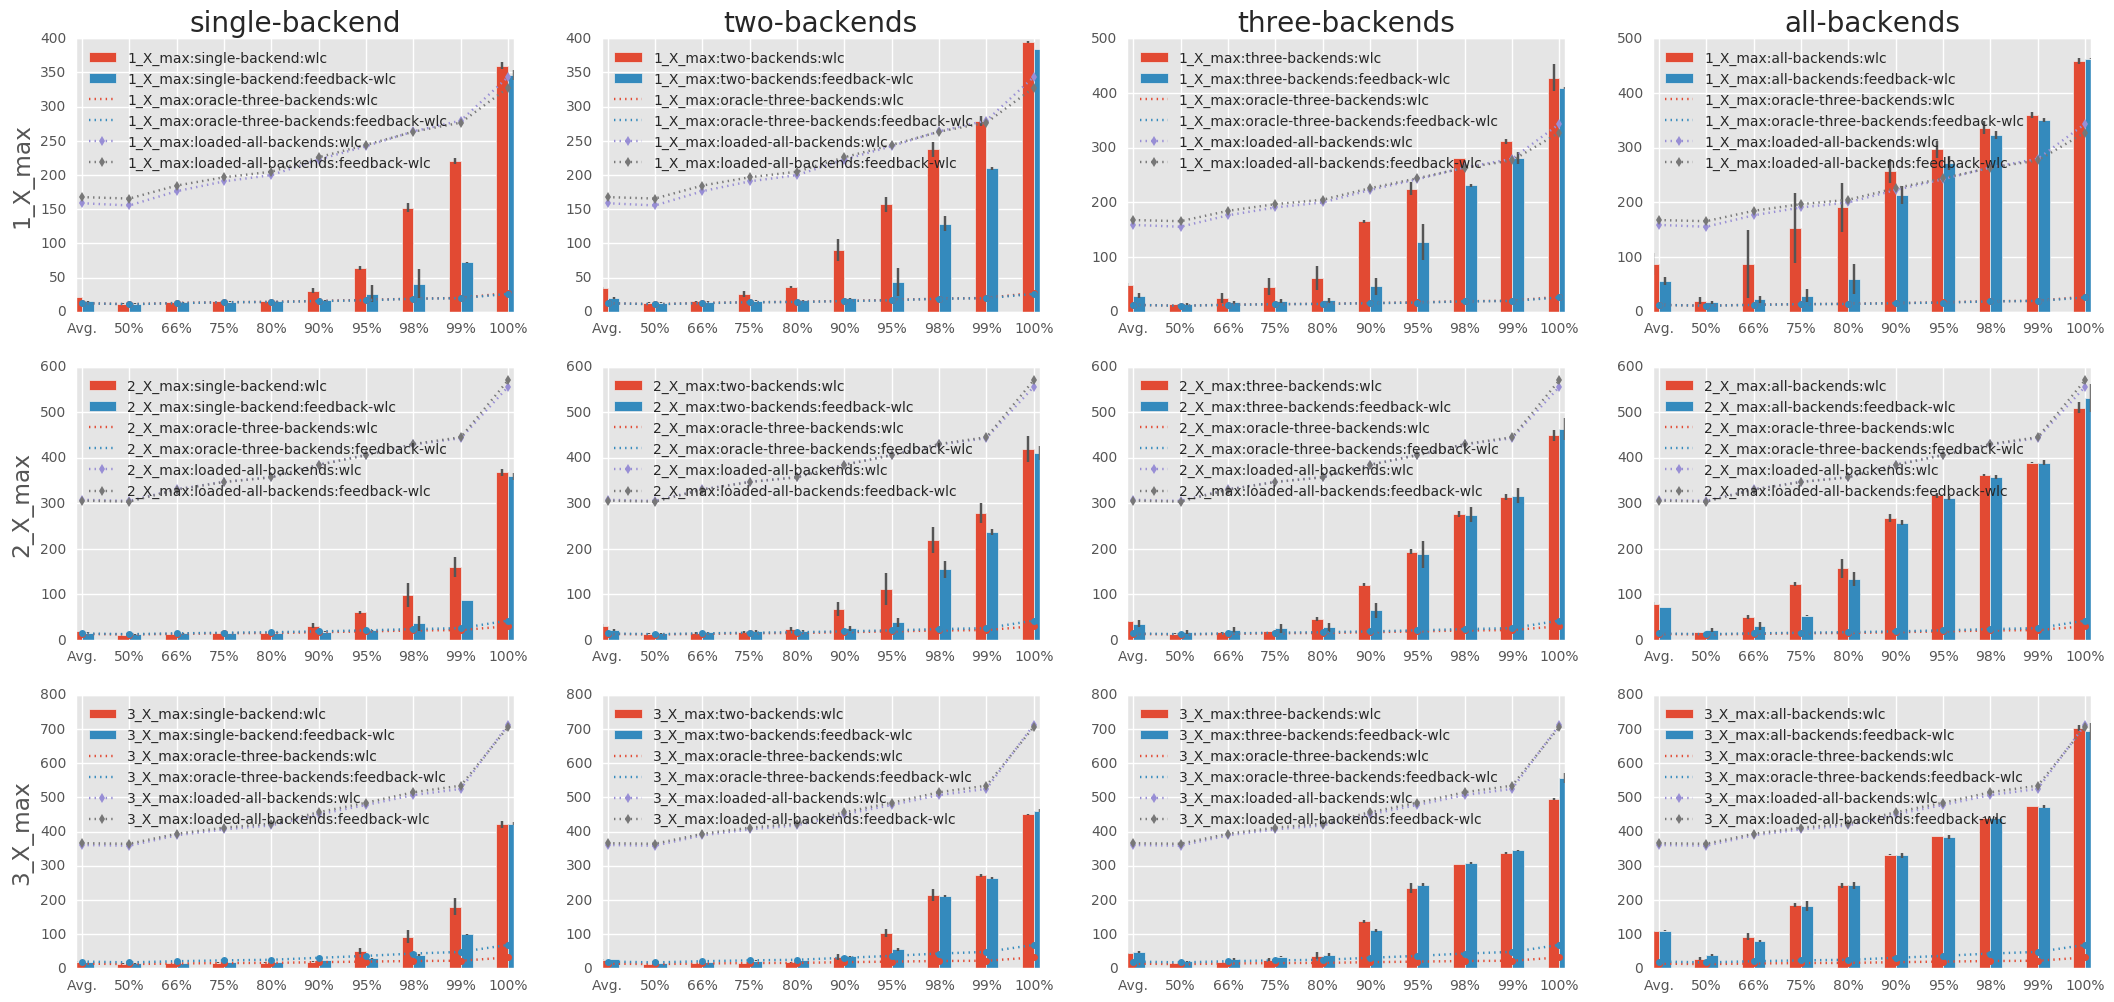

In [59]:
fig, ax = plt.subplots(nrows=3, ncols=4)

for i in range(len(arrival_rates)):
    for j in range(len(run_types)):
        param_list = []
        or_param_list = []
        lo_param_list = []
        for algo in algos:
            param_list.append(arrival_rates[i]+":"+run_types[j]+":"+algo)
            or_param_list.append(arrival_rates[i]+":"+or_run_types[0]+":"+algo)
            lo_param_list.append(arrival_rates[i]+":"+lo_run_types[0]+":"+algo)
        title = ''
        if i == 0:
            title = run_types[j]
        means[param_list].plot(kind='bar', yerr=errs, legend=True, figsize=(26,12), ax=ax[i,j], title=title)
        or_rt_plot_data[or_param_list].plot(legend=True, figsize=(26,12), ax=ax[i,j], linestyle=':', marker='o', markersize=5)
        lo_rt_plot_data[lo_param_list].plot(legend=True, figsize=(26,12), ax=ax[i,j], linestyle=':', marker='d', markersize=5)
        ylabel = ''
        if j == 0:
            ylabel = arrival_rates[i]
        ax[i,j].set_ylabel(ylabel)
        ax[i,j].set_xlabel('')     
    
fig.savefig('time-varying-plots-with-loaded-trendline.pdf')